In [1]:
import numpy as np

In [2]:
from orbit_generation.visualize import visualize_static_orbits
from orbit_generation.stats import plot_histograms_comparison, plot_latent_space
from orbit_generation.constants import EM_POINTS

In [3]:
route = r"C:\Users\alvar\Desktop\nbs_experiments\scaled_generation.npy"
data = np.load(route)
data.shape

(100, 300, 7)

In [4]:
no_time_generation = data[:,:,1:]
no_time_generation.shape

(100, 300, 6)

In [5]:
display_generation = np.transpose(no_time_generation, (0, 2, 1))

In [6]:
orbit_indices=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]
orbit_indices=[1]

In [7]:
import random

orbit_indices=random.sample(range(0, 99 + 1), 25)
print(orbit_indices)

[35, 7, 52, 0, 46, 5, 82, 38, 65, 85, 84, 55, 12, 86, 29, 4, 54, 63, 36, 92, 11, 24, 89, 74, 73]


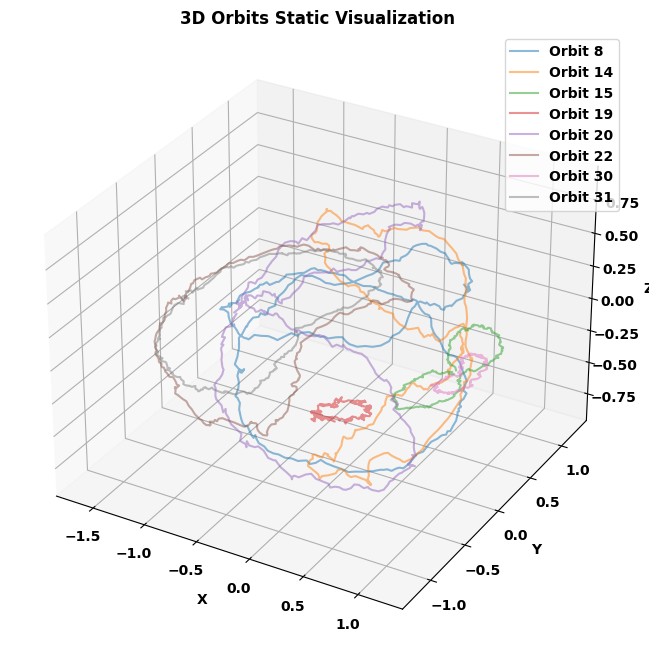

In [8]:
visualize_static_orbits(data= display_generation, show_legend=True, orbit_indices=[8,14,15,19,20,22,30,31])

In [9]:
#| export
#| hide
import numpy as np
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from typing import Optional, List, Dict

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from typing import Optional, List, Dict

def visualize_static_orbits(data: np.ndarray,  # The orbit data with shape (num_orbits, 6, num_time_points).
                            time_instants: Optional[List[int]] = None,  # Time points to highlight; defaults to None.
                            orbit_indices: Optional[List[int]] = None,  # Indices of orbits to visualize; defaults to all.
                            point_dict: Optional[Dict[str, tuple]] = None,  # Dictionary of extra points to plot.
                            show_legend: bool = True,  # Flag to indicate whether to show a legend.
                            save_path: Optional[str] = None,  # Path to save the figure; defaults to None.
                            plot_reference_box: bool = True  # Flag to indicate whether to plot the reference box.
                           ) -> None:
    """
    Visualizes orbits in 3D space and highlights specified time instants for each selected orbit.
    """
    # Use Matplotlib's Computer Modern font
    plt.rcParams.update({
        'font.family': 'serif',
        'font.serif': ['DejaVu Serif'],
        'font.size': 10,
        'text.usetex': False
    })

    if time_instants is None:
        time_instants = []  # Initialize to empty list if None.

    # Validate time instants are within the range of available time points.
    max_time_instants = data.shape[2]
    for time_instant in time_instants:
        if time_instant < 0 or time_instant >= max_time_instants:
            raise ValueError(f"Time instant {time_instant} is out of range.")

    # Validate orbit indices are within the range of available orbits.
    num_orbits = data.shape[0]
    if orbit_indices is None:
        orbit_indices = range(num_orbits)  # Use all orbits by default.
    else:
        for index in orbit_indices:
            if index < 0 or index >= num_orbits:
                raise ValueError(f"Orbit index {index} is out of range.")

    # Setup a 3D plot.
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Plot each selected orbit.
    for index in orbit_indices:
        X = data[index, 0, :]  # X coordinates
        Y = data[index, 1, :]  # Y coordinates
        Z = data[index, 2, :]  # Z coordinates
        ax.plot(X, Y, Z, alpha=0.5)  # Plot each orbit without a label.

    # Generate a color map for time instants if they exist.
    colors = plt.cm.jet(np.linspace(0, 1, len(time_instants)))

    # Highlight specified time instants without adding to the legend.
    if time_instants:
        for time_instant, color in zip(time_instants, colors):
            for index in orbit_indices:
                posx, posy, posz = data[index, 0:3, time_instant]
                ax.scatter(posx, posy, posz, color=color, s=100, zorder=5)  # Scatter without a label.

    # Plot additional points if provided.
    if point_dict:
        for point_name, coords in point_dict.items():
            ax.scatter(*coords, label=point_name, s=30, depthshade=True)  # Plot points with smaller size and add label.

    # Set labels and title.
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    plt.title('Synthetic Orbits')

    # Display the legend if requested.
    if show_legend and point_dict:
        ax.legend()

    # Set the background color and plot reference box if requested.
    if plot_reference_box:
        ax.set_facecolor('white')  # White background
        ax.grid(True)  # Show grid
        # Set limits for the reference box
        ax.set_xlim([data[:, 0, :].min(), data[:, 0, :].max()])
        ax.set_ylim([data[:, 1, :].min(), data[:, 1, :].max()])
        ax.set_zlim([data[:, 2, :].min(), data[:, 2, :].max()])
    else:
        ax.set_facecolor('white')
        ax.grid(False)
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_zticks([])

    # Save the figure if a save path is provided.
    if save_path:
        plt.savefig(save_path)

    # Show the plot.
    plt.show()


In [15]:
MU = 0.0122

EM_POINTS={
    'Moon': (1-MU,0,0),
    'Earth': (-MU,0,0),
    'Lagrange 1': (0.8369,0,0),
    'Lagrange 2': (1.1557,0,0),
    'Lagrange 3': (-1.0051,0,0),
    'Lagrange 4': (0.4879,0.8660,0),
    'Lagrange 5': (0.4879,-0.8660,0)
}

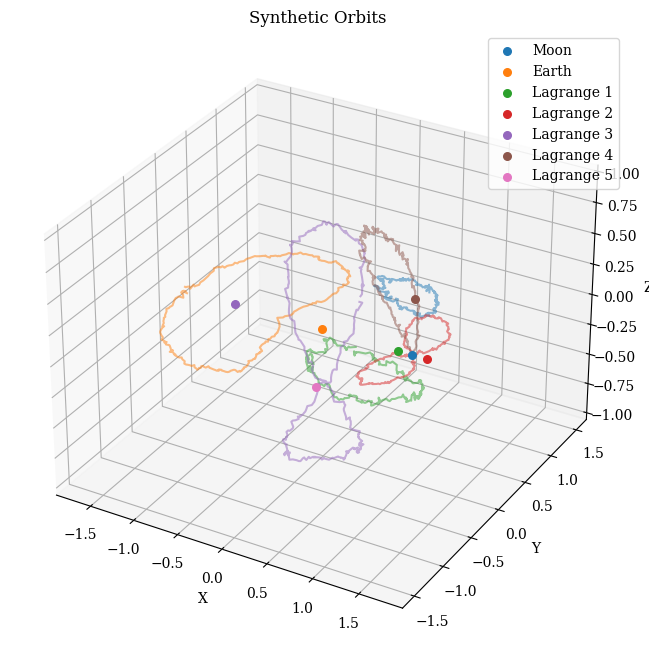

In [18]:
visualize_static_orbits(data= display_generation,orbit_indices=[2,31,33,53,83,93], point_dict=EM_POINTS)

In [12]:
# Generate a list from 0 to 99
full_list = list(range(100))

# List to subtract
subtract_list = [13, 73]

# Subtract the elements of subtract_list from full_list
result_list = [num for num in full_list if num not in subtract_list]


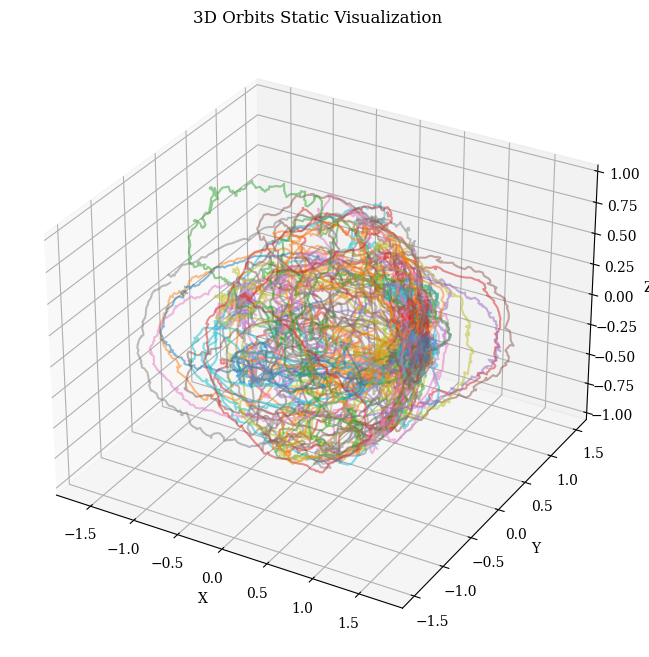

In [13]:
visualize_static_orbits(display_generation, show_legend=False, orbit_indices=result_list)